In [49]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pdb
from pdb import set_trace
import numpy
from util import load_matrix_response, pre_process
from analysis import full_width_half_max, plot_pre_post_scatter, avg_slope
from scipy import ndimage
import pdb
from sklearn.decomposition import PCA


In [50]:
#Name of results csv

#Specify folder to save results
results_dir =  '/mnt/d/ABG_Projects_Backup/ssn_modelling/ssn-simulator/results/27-11/test_staircase_low_noise/noisy_responses_train_untrain_control/'
#Load response matrices
epoch = 1
mid_layer_pre_control = np.load(os.path.join(results_dir, 'epoch_'+str(epoch)+'_ori_0_mid.npy')).squeeze()
mid_layer_pre_train = np.load(os.path.join(results_dir, 'epoch_'+str(epoch)+'_ori_55_mid.npy')).squeeze()
mid_layer_pre_untrain = np.load(os.path.join(results_dir, 'epoch_'+str(epoch)+'_ori_125_mid.npy')).squeeze()

sup_layer_pre_control = np.load(os.path.join(results_dir, 'epoch_'+str(epoch)+'_ori_0_sup.npy')).squeeze()
sup_layer_pre_train = np.load(os.path.join(results_dir, 'epoch_'+str(epoch)+'_ori_55_sup.npy')).squeeze()
sup_layer_pre_untrain = np.load(os.path.join(results_dir, 'epoch_'+str(epoch)+'_ori_125_sup.npy')).squeeze()

epoch = 1061
mid_layer_post_control = np.load(os.path.join(results_dir, 'epoch_'+str(epoch)+'_ori_0_mid.npy')).squeeze()
mid_layer_post_train = np.load(os.path.join(results_dir, 'epoch_'+str(epoch)+'_ori_55_mid.npy')).squeeze()
mid_layer_post_untrain = np.load(os.path.join(results_dir, 'epoch_'+str(epoch)+'_ori_125_mid.npy')).squeeze()

sup_layer_post_control = np.load(os.path.join(results_dir, 'epoch_'+str(epoch)+'_ori_0_sup.npy')).squeeze()
sup_layer_post_train = np.load(os.path.join(results_dir, 'epoch_'+str(epoch)+'_ori_55_sup.npy')).squeeze()
sup_layer_post_untrain = np.load(os.path.join(results_dir, 'epoch_'+str(epoch)+'_ori_125_sup.npy')).squeeze()

#Plotting indices
centre_E_indices = np.linspace(0, 80, 81).reshape(9,9)[2:7, 2:7].ravel().astype(int)
centre_I_indices = (centre_E_indices+81).astype(int)
E_indices_mid = np.linspace(0, 647, 648).round().reshape(8, 81, -1)[0:9:2].ravel().astype(int)
I_indices_mid =np.linspace(0, 647, 648).round().reshape(8, 81, -1)[1:9:2].ravel().astype(int)
E_indices_sup = np.linspace(0, 80, 81).astype(int)
I_indices_sup = np.linspace(81, 161, 81).astype(int)


In [54]:
test = mid_layer_pre_control.reshape(300, 9, 9, -1).sum(axis = 3)

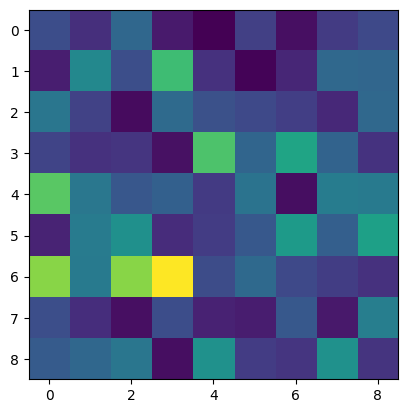

In [58]:
plt.imshow(test[10, :, :])

In [41]:
results_dir =  '/mnt/d/ABG_Projects_Backup/ssn_modelling/ssn-simulator/results/04-12/no_kappa_stimuli_noise40.0gE0.15/noisy_responses_train_untrain_control/'
mid_response = np.load(os.path.join(results_dir, 'epoch_1_mid.npy'))
labels = np.load(os.path.join(results_dir, 'epoch_1_labels.npy'))

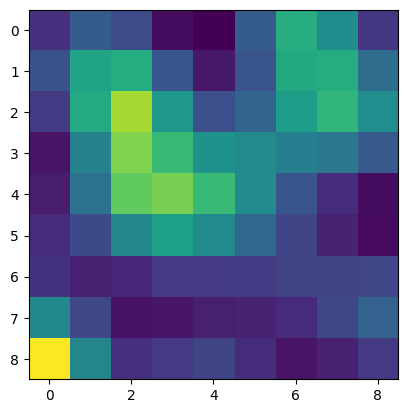

In [48]:
plt.imshow(mid_response[0, 81:162].reshape(9,9))

In [42]:
mid_response.shape

(30, 648)

In [31]:
smooth_data = []
for trial_response in sup_layer_post_control:

    trial_response = trial_response.reshape(9,9,-1)
    smoothed_data = numpy.asarray([ndimage.gaussian_filter(numpy.reshape(trial_response[:, :, i], (9,9)), sigma = 1) for i in range(0, trial_response.shape[2])]).ravel()
    smooth_data.append(smoothed_data)
smooth_data = np.vstack(smooth_data)            

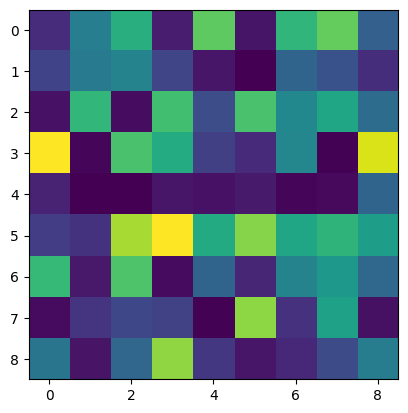

In [36]:
response = sup_layer_post_control
first_response = response[6][81:]
plt.imshow(first_response.reshape(9,9))

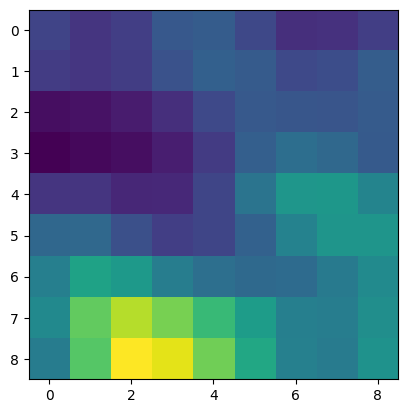

In [37]:
response = smooth_data
first_response = response[6][81:]
plt.imshow(first_response.reshape(9,9))

In [20]:
for trial_response in mid_layer_pre_control:
    
    trial_response = trial_response.reshape(9,9,-1)
    ndimage.gaussian_filter(trial_response, axis = (0,1), sigma = 1)

TypeError: gaussian_filter() got an unexpected keyword argument 'axis'

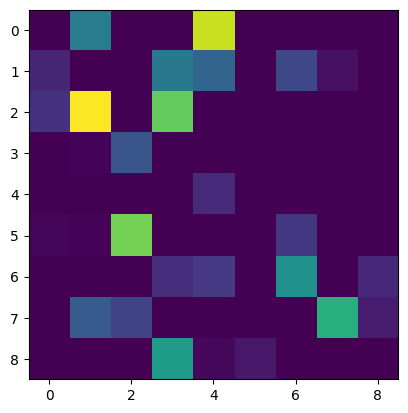

In [7]:
plt.imshow(mid_layer_pre_control[0][:81].reshape(9,9))

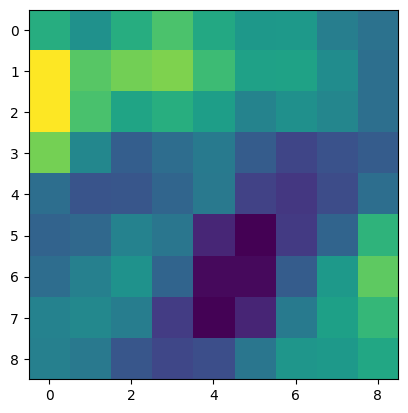

In [16]:
plt.imshow(mid_layer_control_smooth_pre[0].reshape(9,9))

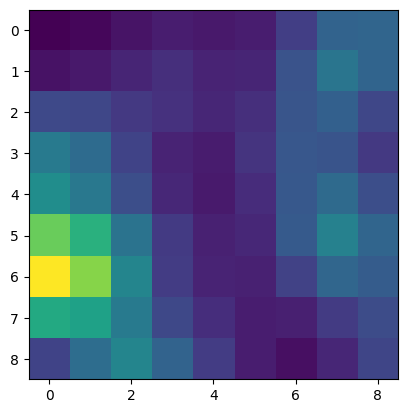

In [11]:
plt.imshow(smooth_data[0][:81].reshape(9,9))

In [14]:
mid_layer_control_smooth_pre = pre_process(mid_layer_pre_control)
mid_layer_untrain_smooth_pre = pre_process(mid_layer_pre_untrain)
mid_layer_train_smooth_pre = pre_process(mid_layer_pre_train)

sup_layer_control_smooth_pre = pre_process(sup_layer_pre_control)
sup_layer_untrain_smooth_pre = pre_process(sup_layer_pre_untrain)
sup_layer_train_smooth_pre = pre_process(sup_layer_pre_train)

sup_layer_control_smooth_post = pre_process(sup_layer_post_control)
sup_layer_untrain_smooth_post = pre_process(sup_layer_post_untrain)
sup_layer_train_smooth_post = pre_process(sup_layer_post_train)


In [95]:
sup_layer_control_smooth_pre.shape

(300, 81)

In [93]:
scipy.io.savemat('smooth_superficial_pre.mat', dict(control = sup_layer_control_smooth_pre, train = sup_layer_train_smooth_pre, untrain =sup_layer_untrain_smooth_pre) )
scipy.io.savemat('smooth_superficial_pre.mat', dict(control = sup_layer_control_smooth_pre, train = sup_layer_train_smooth_pre, untrain =sup_layer_untrain_smooth_pre) )

In [85]:
all_sup_post_data = np.vstack([sup_layer_control_smooth_post, sup_layer_untrain_smooth_post, sup_layer_train_smooth_post])

In [86]:
all_sup_pre_data = np.vstack([sup_layer_control_smooth_pre, sup_layer_untrain_smooth_pre, sup_layer_train_smooth_pre])

In [87]:
#Apply PCA
pca_post = PCA(n_components = 10)
pca_post.fit(all_post_data)
np.sum(pca_post.explained_variance_ratio_)

0.66369504

In [88]:
#Transform data - apply dimensionality reduction
transform_control_post = pca_post.transform(sup_layer_control_smooth_post)
transform_train_post = pca_post.transform(sup_layer_train_smooth_post)
transform_untrain_post = pca_post.transform(sup_layer_untrain_smooth_post)

In [91]:
import scipy.io

scipy.io.savemat('transform_superficial.mat', dict(control = transform_control_post, train = transform_train_post, untrain =transform_untrain_post) )

In [78]:
from scipy.spatial.distance import mahalanobis

#Find mean and covariance of 
mu = np.mean(sample.T, axis = 0)
sigma = np.cov(sample.T)
mahalanobis(Y[0], mu, np.linalg.inv(sigma))

ValueError: Input vector should be 1-D.

In [81]:
smooth

array([0.48534879, 0.45876004])

In [75]:
my_mahalanobis(Y, sample.T)

DeviceArray([ 7.9055586, 30.9428   , 30.728415 , 61.461338 ], dtype=float32)

In [76]:
np.random.seed(10)
sample = np.random.rand(2, 100)
sample.T

array([[0.77132064, 0.57813643],
       [0.02075195, 0.85393375],
       [0.63364823, 0.06809727],
       [0.74880388, 0.46453081],
       [0.49850701, 0.78194912],
       [0.22479665, 0.71860281],
       [0.19806286, 0.58602198],
       [0.76053071, 0.03709441],
       [0.16911084, 0.35065639],
       [0.08833981, 0.56319068],
       [0.68535982, 0.29972987],
       [0.95339335, 0.51233415],
       [0.00394827, 0.67346693],
       [0.51219226, 0.15919373],
       [0.81262096, 0.05047767],
       [0.61252607, 0.33781589],
       [0.72175532, 0.10806377],
       [0.29187607, 0.17890281],
       [0.91777412, 0.8858271 ],
       [0.71457578, 0.36536497],
       [0.54254437, 0.21876935],
       [0.14217005, 0.75249617],
       [0.37334076, 0.10687958],
       [0.67413362, 0.74460324],
       [0.44183317, 0.46978529],
       [0.43401399, 0.59825567],
       [0.61776698, 0.14762019],
       [0.51313824, 0.18403482],
       [0.65039718, 0.64507213],
       [0.60103895, 0.04862801],
       [0.

In [36]:
#Transform data - apply dimensionality reduction
transform_control_post = pca_post.transform(sup_layer_control_smooth_post)
transform_train_post = pca_post.transform(sup_layer_train_smooth_post)
transform_untrain_post = pca_post.transform(sup_layer_untrain_smooth_post)

(array([ 4., 15., 34., 46., 62., 51., 41., 29.,  8., 10.]),
 array([1.30223441, 1.6842984 , 2.06636238, 2.44842649, 2.83049059,
        3.21255445, 3.59461856, 3.97668266, 4.35874653, 4.74081087,
        5.12287474]),
 <BarContainer object of 10 artists>)

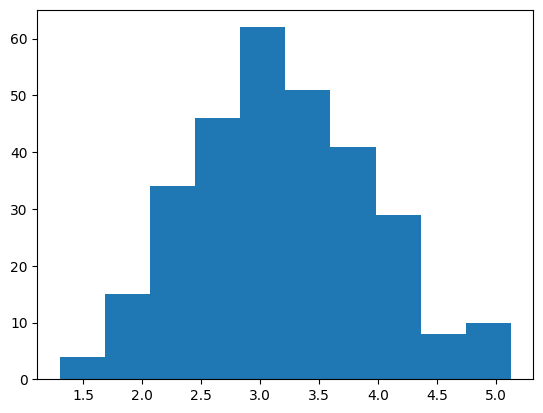

In [44]:
from util import my_mahalanobis
plt.hist(np.sqrt(my_mahalanobis(x = transform_train_post, data = transform_control_post)))

(array([ 5., 23., 46., 67., 53., 58., 29., 12.,  4.,  3.]),
 array([1.27689981, 1.7220571 , 2.16721439, 2.61237192, 3.05752921,
        3.5026865 , 3.94784379, 4.39300108, 4.83815861, 5.28331566,
        5.72847319]),
 <BarContainer object of 10 artists>)

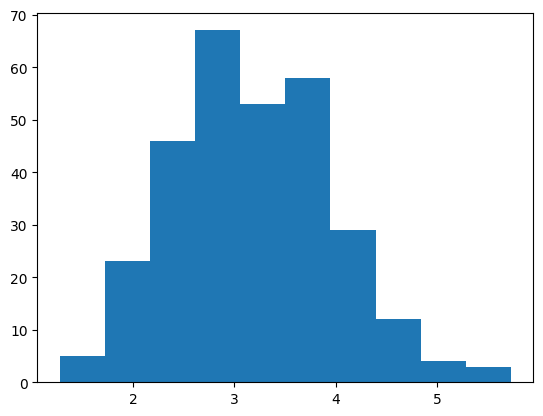

In [45]:
my_mahalanobis(x = transform_untrain_post, data = transform_control_post).mean()
plt.hist(np.sqrt(my_mahalanobis(x = transform_untrain_post, data = transform_control_post)))

In [28]:

#Inialise PCA with number of components
pca = PCA(n_components = 10)
#Fit PCA to data 
pca.fit(sup_layer_control_smooth_post)
pca.explained_variance_ratio_

array([0.10842206, 0.10288425, 0.08496267, 0.07803   , 0.06076792,
       0.0575123 , 0.05550921, 0.04658374, 0.04486386, 0.04059693],
      dtype=float32)

In [29]:
np.sum(pca.explained_variance_ratio_)

0.680133

In [12]:
#Transform data - apply dimensionality reduction
transform_control = pca.transform(sup_layer_control_smooth_pre)
transform_train = pca.transform(sup_layer_train_smooth_pre)
transform_untrain = pca.transform(sup_layer_untrain_smooth_pre)

In [14]:
my_mahalanobis(x = transform_untrain, data = transform_control).mean()

DeviceArray(14.376208, dtype=float32)

In [14]:
my_mahalanobis(x = transform_untrain, data = transform_control).mean()

DeviceArray(14.376208, dtype=float32)

In [30]:
from scipy.spatial.distance import mahalanobis

#Find mean and covariance of 
mu = np.mean(transform_control, axis = 0)
sigma = np.cov(transform_control.T)


pre_mu = np.mean(pre_transform_control, axis = 0)
pre_sigma = np.cov(pre_transform_control.T)

In [31]:
trained_distances = []
for i in transform_train:
    trained_distances.append(mahalanobis(i, mu, np.linalg.inv(sigma)))
np.asarray(trained_distances).mean()

DeviceArray(3.3941839, dtype=float32)

In [34]:
untrained_distances = []
for i in transform_untrain:
    untrained_distances.append(mahalanobis(i, mu, np.linalg.inv(sigma)))
np.asarray(untrained_distances)

DeviceArray([2.3618038, 4.9237423, 3.4926753, 2.7508018, 3.7471502,
             4.3944755, 3.6799912, 4.10959  , 4.518492 , 5.6758556,
             4.653206 , 3.6061344, 4.0120616, 3.629686 , 3.4005148,
             2.2211025, 4.5168924, 3.548146 , 3.695373 , 3.9735277,
             3.5225062, 4.0530877, 3.353156 , 2.2409844, 3.3001628,
             3.6195083, 3.780131 , 3.8985147, 4.418197 , 3.4297907,
             3.762493 , 3.7984009, 3.2067156, 4.4786305, 3.057332 ,
             3.7324119, 3.1199894, 3.4463987, 4.061498 , 4.0163536,
             2.6117587, 3.9592857, 3.504186 , 3.3801916, 3.7458806,
             3.078669 , 4.0176406, 4.1934824, 3.0071979, 2.619849 ,
             3.1684697, 3.2155106, 3.3058228, 3.7895744, 3.3887587,
             2.7996616, 3.6690588, 4.628241 , 2.3848011, 2.9055345,
             3.1072106, 3.6871169, 3.3263228, 4.9380617, 4.251447 ,
             3.584522 , 3.8196733, 4.932555 , 3.3892817, 2.5505033,
             4.206847 , 2.9308944, 2.6982799, 4.

In [16]:
import scipy
def my_mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.T)
    inv_covmat = scipy.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

In [15]:
my_mahalanobis(x = pre_transform_train, data = pre_transform_control).mean()

DeviceArray(13.773008, dtype=float32)

In [26]:
my_mahalanobis(x = transform_train, data = transform_control).mean()

DeviceArray(12.012745, dtype=float32)

In [17]:
my_mahalanobis(x = transform_untrain, data = transform_control).mean()

DeviceArray(13.101074, dtype=float32)

In [18]:
my_mahalanobis(x = pre_transform_untrain, data = pre_transform_control).mean()

DeviceArray(15.093985, dtype=float32)